# Anomaly Detection Time Series

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X=np.sort(25*np.random.rand(150,1),axis=0)
y=np.sin(X).ravel()
y[::5]+=3*(0.5-np.random.rand(30))

In [4]:
X

array([[ 0.38937824],
       [ 0.56279868],
       [ 1.04096024],
       [ 1.2065219 ],
       [ 1.40225415],
       [ 1.43487233],
       [ 1.50078714],
       [ 1.71041704],
       [ 1.87891029],
       [ 1.96692448],
       [ 2.00889212],
       [ 2.01205619],
       [ 2.35711247],
       [ 2.42704674],
       [ 2.56487161],
       [ 2.61804522],
       [ 2.75925824],
       [ 3.04626612],
       [ 3.08266151],
       [ 3.46707222],
       [ 3.54545802],
       [ 3.73867276],
       [ 3.79710998],
       [ 3.8574613 ],
       [ 4.28823862],
       [ 4.53286034],
       [ 4.98205069],
       [ 5.27026414],
       [ 5.2990678 ],
       [ 5.50493356],
       [ 5.54200913],
       [ 5.54355518],
       [ 5.79539897],
       [ 6.24253427],
       [ 6.27073557],
       [ 6.66444197],
       [ 6.66567089],
       [ 7.23687976],
       [ 7.27548931],
       [ 7.39344005],
       [ 7.39759962],
       [ 7.47612602],
       [ 7.52687143],
       [ 7.52794009],
       [ 7.5368569 ],
       [ 7

In [5]:
y

array([-0.41158233,  0.53355531,  0.86288992,  0.93438251,  0.98583036,
        1.03918312,  0.99755036,  0.99026885,  0.95290723,  0.92256186,
        0.24901873,  0.90421432,  0.70645737,  0.65527447,  0.54527827,
        1.39085902,  0.37308735,  0.09518222,  0.05889704, -0.31976321,
        0.87372693, -0.56223018, -0.60956943, -0.65627308, -0.91138873,
       -1.01968958, -0.96386107, -0.84838188, -0.83278387, -0.70203549,
       -0.94232079, -0.67401472, -0.46867155, -0.04063984, -0.01244941,
        1.7725862 ,  0.37322759,  0.81555895,  0.83728794,  0.89581193,
        0.45062435,  0.9294579 ,  0.94697481,  0.94731764,  0.95013596,
        0.58981295,  0.99466066,  0.99561713,  0.98762755,  0.98146493,
        2.26905296,  0.83469689,  0.8133873 ,  0.57196306,  0.51688157,
       -1.00476013,  0.40503462,  0.07162063, -0.07518709, -0.13034853,
        0.36947283, -0.19440644, -0.24430214, -0.26951757, -0.27583433,
       -1.2036818 , -0.57778018, -0.70366221, -0.8874144 , -0.92

In [7]:
#Applying SVM model to X and y coordinates
from sklearn.svm import SVR     
model = SVR(kernel='rbf', C=1e3, gamma=.1)

In [8]:
y_rbf = model.fit(X, y).predict(X)

In [9]:
error=y_rbf-y
sup=np.mean(error)+2.33*np.std(error)
inf=np.mean(error)-2.33*np.std(error)
anomalies=np.concatenate([np.where(error>sup)[0],np.where(error<inf)[0]])

In [11]:
anomalies

array([ 55,  80,  85, 130, 140,  20,  35,  50,  70, 100, 120, 135],
      dtype=int64)

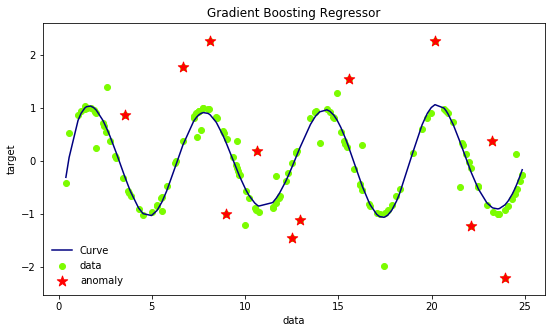

In [13]:
lw = 3
plt.figure(figsize=(9,5))
plt.scatter(X, y, color='lawngreen', label='data')
plt.scatter(X[anomalies], y[anomalies], marker='*',color='red', label='anomaly',s=120)
plt.plot(X, y_rbf, color='navy', label='Curve')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Gradient Boosting Regressor')
plt.legend(loc=3,frameon=False)
plt.show()